# Pymaceuticals Inc.
---

### Analysis

- After removing the duplicate mouse, there was a total of 248 mice included in this study. By looking at summary statistics for each drug regimen, Capomulin had the second lowest mean and median tumor volume, while Ramicane had a slightly lower mean and median tumor volume. This was the same for variance, standard deviation, and standard error of the tumor volumes. Ketapril had the largest values for each statistic. By comparing the number of observed mousepoints for each drug regimen, we can see that Capomulin had the most observed mousepoints followed closely by Ketapril. Ceftamin had the least amount of timepoints recorded. 51% of the mice in the study were male and 49% of the mice were female. After calculating the final tumor volume of mice included in four drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), it was clear that Ceftamin had the largest distribution of tumor volumes, and Capomulin had the smallest distribution size of tumor volumes. Infubinol had one outlier in the tumor volumes that fell below the lower boundary. Looking at a specific mouse who was treated with Capomulin (Mouse ID: l509) and comparing tumor volume over time, we can see that the tumor volume peaked at around 48 mm3 after approximately 20 days. It decreased, with a another increase between roughly 25 and 30 days, until it reached its lowest volume (around 40 mm3) on approximately day 35. After that point, the volume began to increase again. For mice treated with Capomulin, there is a strong positive correlation (0.84) between weights and tumor volumes.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
miceStudyDF = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
miceStudyDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
miceCount = len(miceStudyDF['Mouse ID'].unique())
miceCount

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceDuplicates = miceStudyDF.loc[miceStudyDF.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
miceDuplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
miceDuplicateDF = miceStudyDF.loc[miceStudyDF['Mouse ID'] == "g989", :]
miceDuplicateDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
miceStudyDF = miceStudyDF.loc[miceStudyDF['Mouse ID'] != 'g989', :]
miceStudyDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
newMiceCount = len(miceStudyDF['Mouse ID'].unique())
newMiceCount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
miceStudyByDrugDF = miceStudyDF.groupby('Drug Regimen')
miceMeanTumorVolume = miceStudyByDrugDF['Tumor Volume (mm3)'].mean()
miceMedianTumorVolume = miceStudyByDrugDF['Tumor Volume (mm3)'].median()
miceVarTumorVolume = miceStudyByDrugDF['Tumor Volume (mm3)'].var()
miceStdDevTumorVolume = miceStudyByDrugDF['Tumor Volume (mm3)'].std()
miceSEMTumorVolume = miceStudyByDrugDF['Tumor Volume (mm3)'].sem()
miceStudyByDrugSummaryDF = pd.DataFrame({
    'Mean Tumor Volume': miceMeanTumorVolume,
    'Median Tumor Volume': miceMedianTumorVolume,
    'Tumor Volume Variance': miceVarTumorVolume,
    'Tumor Volume Std. Dev.': miceStdDevTumorVolume,
    'Tumor Volume Std. Err.': miceSEMTumorVolume
})
miceStudyByDrugSummaryDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
miceStudyByDrugDF['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

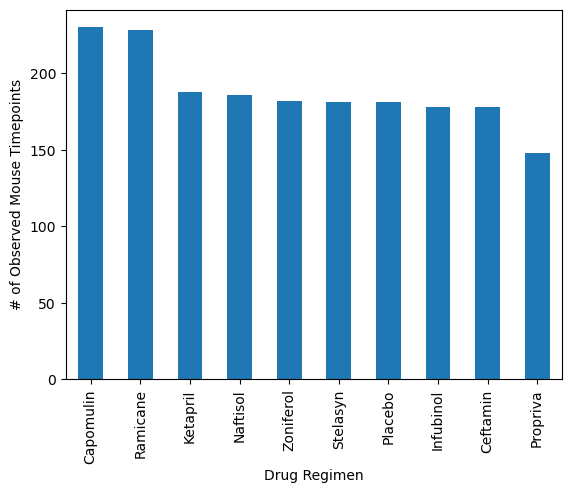

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
miceStudyBarChart = miceStudyDF['Drug Regimen'].value_counts()
miceStudyBarChart.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()


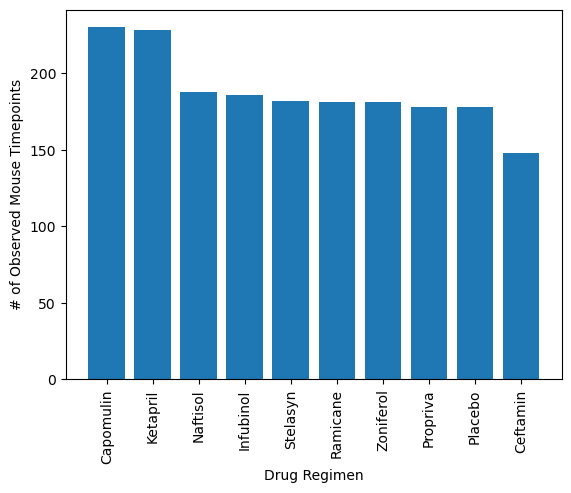

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(miceStudyDF['Drug Regimen'].unique(), miceStudyDF['Drug Regimen'].value_counts(), align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

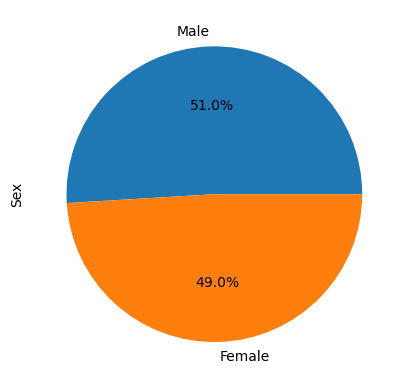

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceMaleAndFemalePlot = miceStudyDF['Sex'].value_counts()
miceMaleAndFemalePlot.plot(kind='pie', autopct="%1.1f%%", ylabel='Sex')
plt.show()

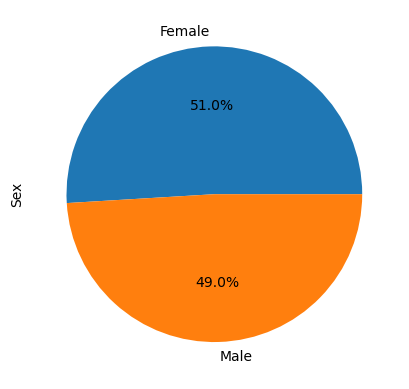

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceStudyDF['Sex'].value_counts(), labels=miceStudyDF['Sex'].unique(), autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
micebyMouseIDDF = miceStudyDF.groupby('Mouse ID')
miceFinalTumorDF = micebyMouseIDDF['Timepoint'].max()
miceFinalTumorDF = miceFinalTumorDF.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
miceStudyFinalTumorDF = pd.merge(miceFinalTumorDF, miceStudyDF, how='left', on=('Mouse ID', 'Timepoint'))
miceStudyFinalTumorDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    miceStudyFinalTumorPerTreatment = miceStudyFinalTumorDF.loc[miceStudyFinalTumorDF['Drug Regimen'] == treatment,:]
    
    # add subset 
    tumorVol.append(miceStudyFinalTumorPerTreatment['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = miceStudyFinalTumorPerTreatment['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerQ = quartiles[0.25]
    median = quartiles[0.5]
    upperQ = quartiles[0.75]
    iqr = upperQ - lowerQ
    upperBound = upperQ + (1.5 * iqr)
    lowerBound = lowerQ - (1.5 * iqr)
    print(f"{treatment}'s potential outliers: {miceStudyFinalTumorPerTreatment.loc[(miceStudyFinalTumorPerTreatment['Tumor Volume (mm3)'] < lowerBound) | (miceStudyFinalTumorPerTreatment['Tumor Volume (mm3)'] > upperBound), 'Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


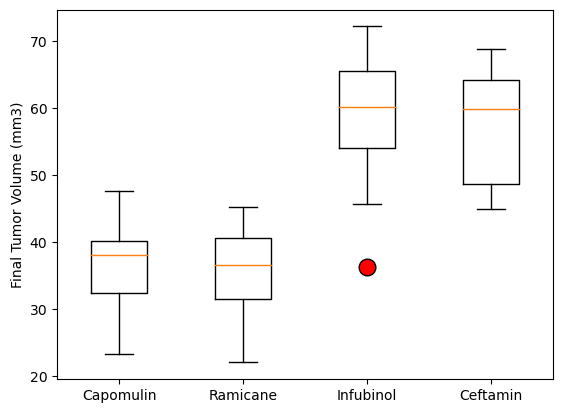

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumorVol, flierprops={'markerfacecolor':'red', 'markersize':12})
plt.ylabel('Final Tumor Volume (mm3)')
x_axis = [1, 2, 3, 4]
tickLocations = [value for value in x_axis]
plt.xticks(tickLocations, treatments)
plt.show()

## Line and Scatter Plots

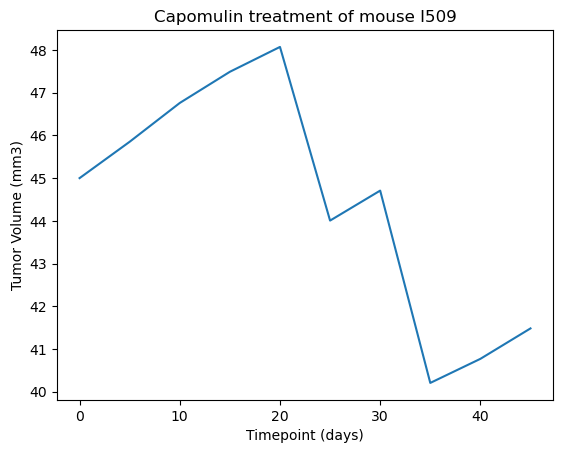

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulinSingleMouseDF = miceStudyDF.loc[miceStudyDF['Mouse ID'] == 'l509',:]
plt.plot(capomulinSingleMouseDF['Timepoint'], capomulinSingleMouseDF['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')
plt.show()


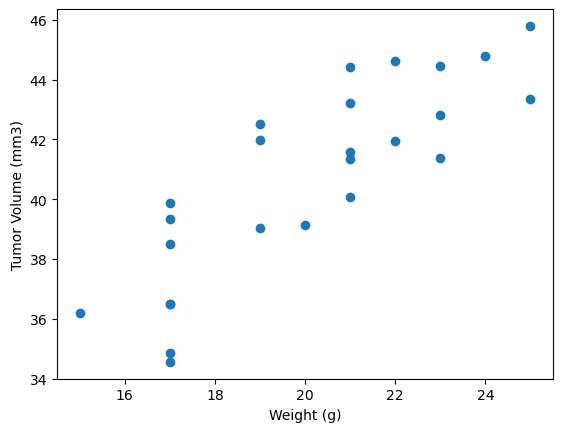

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinDF = miceStudyDF.loc[miceStudyDF['Drug Regimen'] == 'Capomulin',:]
capomulinByMouseDF = capomulinDF.groupby(capomulinDF['Mouse ID'])
weights = capomulinByMouseDF['Weight (g)'].mean()
volumes = capomulinByMouseDF['Tumor Volume (mm3)'].mean()
plt.scatter(weights, volumes)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


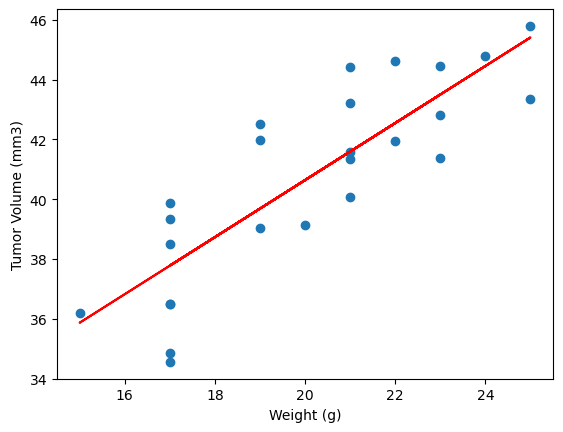

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corrCoefficient = st.pearsonr(weights, volumes)
print(f"The correlation between mouse weight and the average tumor volume is {corrCoefficient[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, volumes)
regressValues = weights * slope + intercept

plt.scatter(weights, volumes)
plt.plot(weights, regressValues, 'r-')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()